<a href="https://colab.research.google.com/github/LLewis/kaggle-deep-learning/blob/main/LLewis_StochasticGD_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train a neural network on Fuel Economy dataset, explore effects of the Learning Rate and batch size on SGD
- Task is to predict the fuel economy of an automobile given features like its type of engine, year made etc.
- reference: https://www.kaggle.com/code/latonyalewis/exercise-stochastic-gradient-descent/edit

In [7]:
#import libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')


<ipython-input-7-7fe744740a0c>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [11]:
#import more libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

#Read in fuel csv file
fuel = pd.read_csv("/content/sample_data/fuel.csv")
X = fuel.copy()
#Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) #log transforms target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))


Input shape: [50]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
#Take a look at the target case 'FE' column and remaining columns are features
fuel.head()

#take a look at the processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


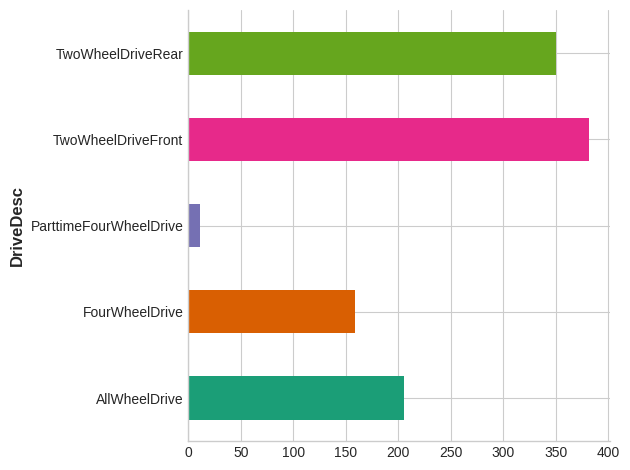

In [19]:
# @title DriveDesc - extra, I created from side graph options - really cool

from matplotlib import pyplot as plt
import seaborn as sns
fuel.groupby('DriveDesc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
# import libraries
from tensorflow import keras
from keras import layers

#Build architecture neural layers
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])
#print(model.weights)

In [27]:
# Add the loss and optimizer
#using the model's compile method, added the Adam optimizer and MAE loss

model.compile(
    optimizer="adam",
    loss="mae",
)

In [28]:
#Train the model
#Now we're ready to start the training! We've told Keras to feed the optimizer 128 rows of the training data at a time (the batch_size)
# and to do that 200 times all the way through the dataset (the epochs)

#output - Keras will keep you updated on the loss as the model trains.

history = model.fit(
    X,y,
    validation_data=(X,y),
    batch_size=128,
    epochs=200,
 )

Epoch 1/200
9/9 [==============================] - 2s 50ms/step - loss: 2.8575 - val_loss: 1.8684
Epoch 2/200
9/9 [==============================] - 0s 17ms/step - loss: 1.0996 - val_loss: 0.8384
Epoch 3/200
9/9 [==============================] - 0s 13ms/step - loss: 0.5758 - val_loss: 0.4456
Epoch 4/200
9/9 [==============================] - 0s 17ms/step - loss: 0.3723 - val_loss: 0.3095
Epoch 5/200
9/9 [==============================] - 0s 12ms/step - loss: 0.2391 - val_loss: 0.2237
Epoch 6/200
9/9 [==============================] - 0s 18ms/step - loss: 0.1852 - val_loss: 0.1513
Epoch 7/200
9/9 [==============================] - 0s 23ms/step - loss: 0.1458 - val_loss: 0.1239
Epoch 8/200
9/9 [==============================] - 0s 26ms/step - loss: 0.1187 - val_loss: 0.1089
Epoch 9/200
9/9 [==============================] - 0s 30ms/step - loss: 0.1043 - val_loss: 0.0958
Epoch 10/200
9/9 [==============================] - 0s 23ms/step - loss: 0.0891 - val_loss: 0.0875
Epoch 11/200
9/9 [=

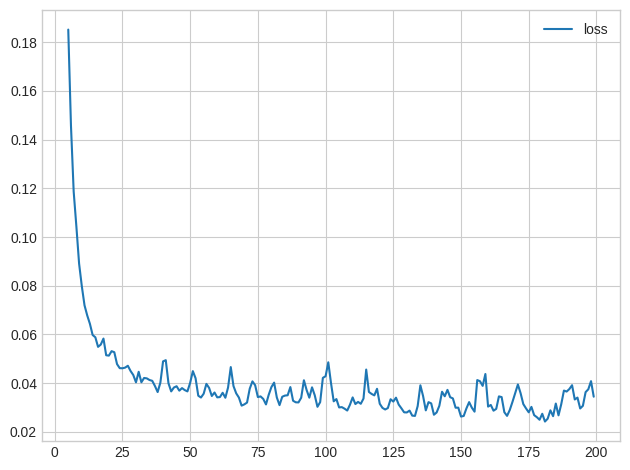

In [34]:
#lastly take a look at the loss curves and evaluate the training.
# Often, a better way to view the loss though is to plot it.
#The fit method keeps a record of the loss produced during training in a History object.
#We'll convert the data to a Pandas dataframe, which makes the plotting easy

history_df = pd.DataFrame(history.history)
#Starting the plot at epoch 5. can change to get different view
history_df.loc[5:,['loss']].plot();

-Evaluate Training
- This depends on how the loss has evolved during training: if the learning curves have levelled off, there won't usually be any advantage to training for additional epochs. Conversely, if the loss appears to still be decreasing, then training for longer could be advantageous.

- With the learning rate and the batch size, you have some control over:

    How long it takes to train a model
    How noisy the learning curves are
    How small the loss becomes

- To get a better understanding of these two parameters, we'll look at the linear model, our ppsimplest neural network. Having only a single weight and a bias, it's easier to see what effect a change of parameter has.

- The next cell will generate an animation like the one in the tutorial. Change the values for learning_rate, batch_size, and num_examples (how many data points) and then run the cell. (It may take a moment or two.) Try the following combinations, or try some of your own:

- learning_rate 	batch_size 	num_examples
- 0.05   32 256
-0.05 	2 	256
-0.05 	128 	256
-0.02 	32 	256
-0.2 	32 	256
-1.0 	32 	256
-0.9 	4096 	8192
-0.99 	4096 	8192

In [36]:
#Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 0.05
batch_size = 32
num_examples = 256

###animate_sgd(
 #   learning_rate=learning_rate,
 #  batch_size=batch_size,
 #  num_examples=num_examples,
 # # You can also change these, if you like
 # steps=50, # total training steps (batches seen)
 #true_w=3.0, # the slope of the data
 #true_b=2.0, # the bias of the data
#)
###

- You probably saw that smaller batch sizes gave noisier weight updates and loss curves. This is because each batch is a small sample of data and smaller samples tend to give noisier estimates. Smaller batches can have an "averaging" effect though which can be beneficial.

- Smaller learning rates make the updates smaller and the training takes longer to converge. Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely. (Try setting the learning rate to a large value like 0.99 to see this.)